In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
datos = pd.read_csv("California_Fire_Incidents.csv")

In [4]:
datos

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,NaN,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,NaN,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [10]:
for columna in datos.columns:
    print(datos[columna].notna().value_counts())

True     1633
False       3
Name: AcresBurned, dtype: int64
True    1636
Name: Active, dtype: int64
True    1636
Name: AdminUnit, dtype: int64
False    1608
True       28
Name: AirTankers, dtype: int64
True    1636
Name: ArchiveYear, dtype: int64
True    1636
Name: CalFireIncident, dtype: int64
True    1636
Name: CanonicalUrl, dtype: int64
False    1352
True      284
Name: ConditionStatement, dtype: int64
False    1525
True      111
Name: ControlStatement, dtype: int64
True    1636
Name: Counties, dtype: int64
True    1636
Name: CountyIds, dtype: int64
False    1465
True      171
Name: CrewsInvolved, dtype: int64
False    1513
True      123
Name: Dozers, dtype: int64
False    1445
True      191
Name: Engines, dtype: int64
True     1577
False      59
Name: Extinguished, dtype: int64
False    1615
True       21
Name: Fatalities, dtype: int64
True    1636
Name: Featured, dtype: int64
True    1636
Name: Final, dtype: int64
False    1624
True       12
Name: FuelType, dtype: int64
False    1

In [11]:
datos.dropna()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders


In [17]:
def pintarGraficoBarras(datos, columna):
    plt.figure(figsize=(6,6))
    plt.title(columna)
    sns.countplot(data=datos, x=columna)
    plt.show()
def pintarHistograma(datos, columna):
    plt.figure(figsize=(6,6))
    plt.title(columna)
    sns.histplot(data=datos, x=columna)
    plt.show()

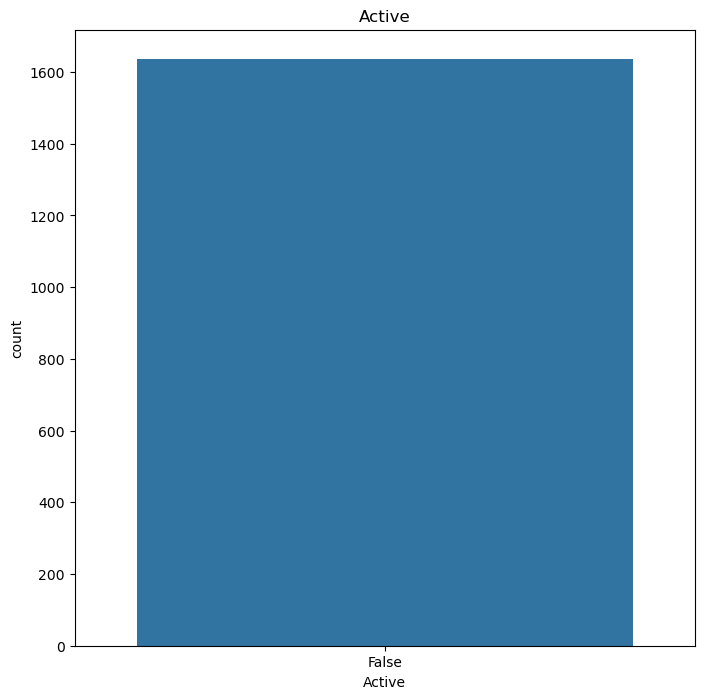

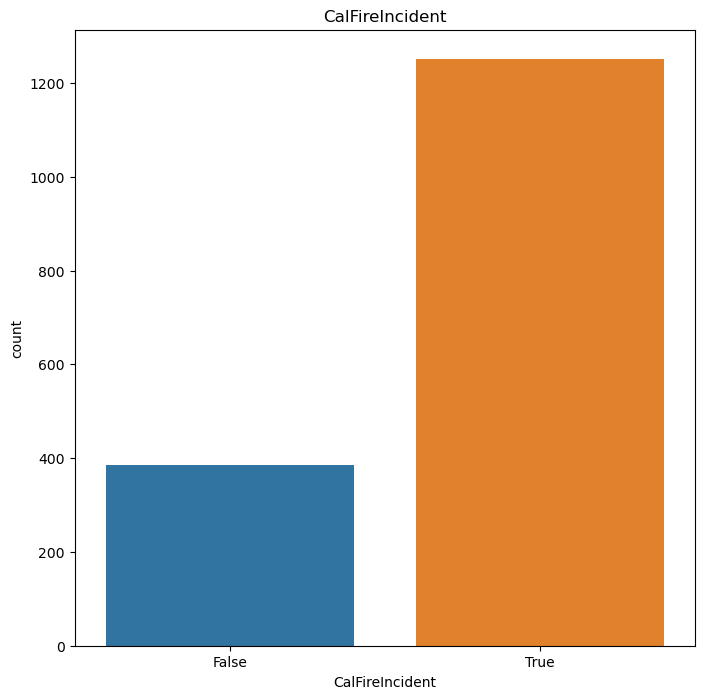

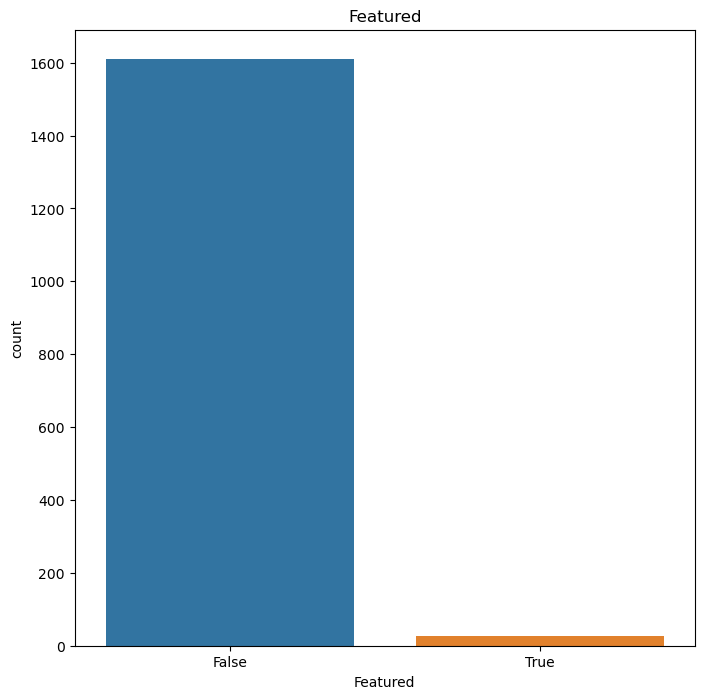

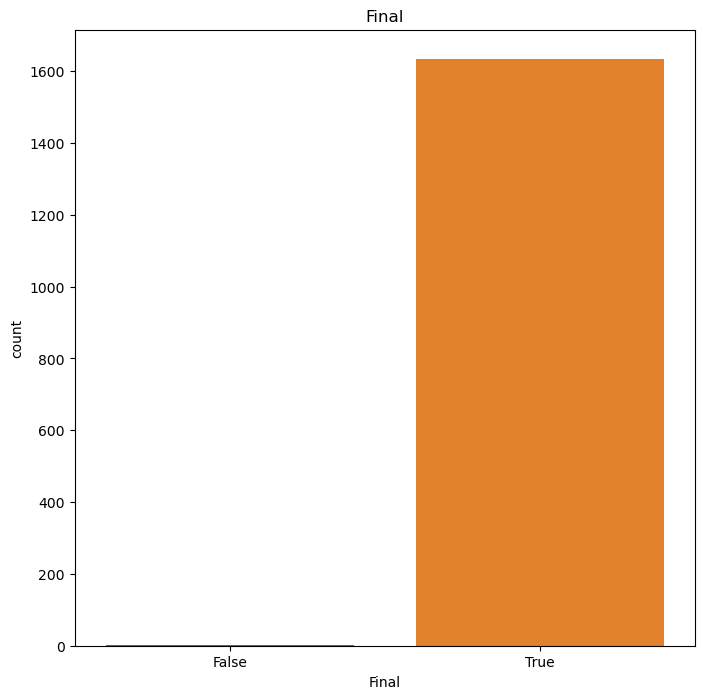

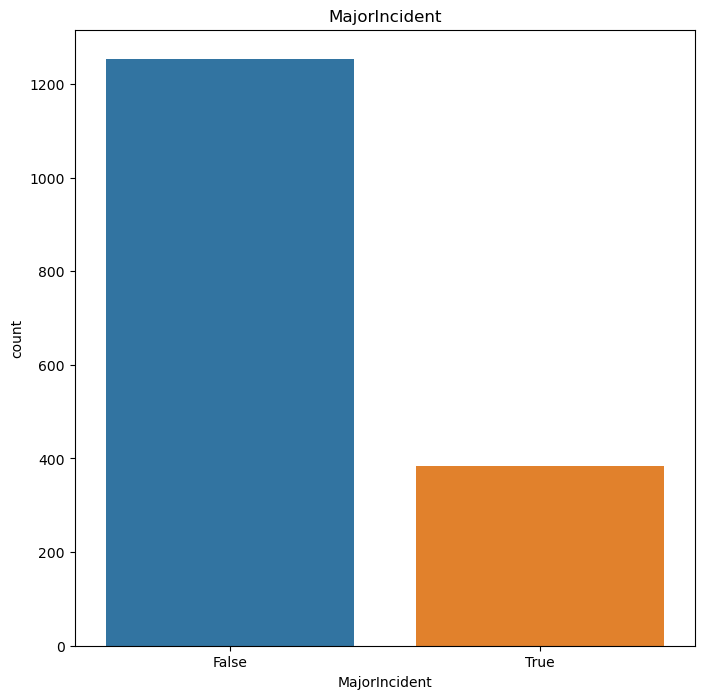

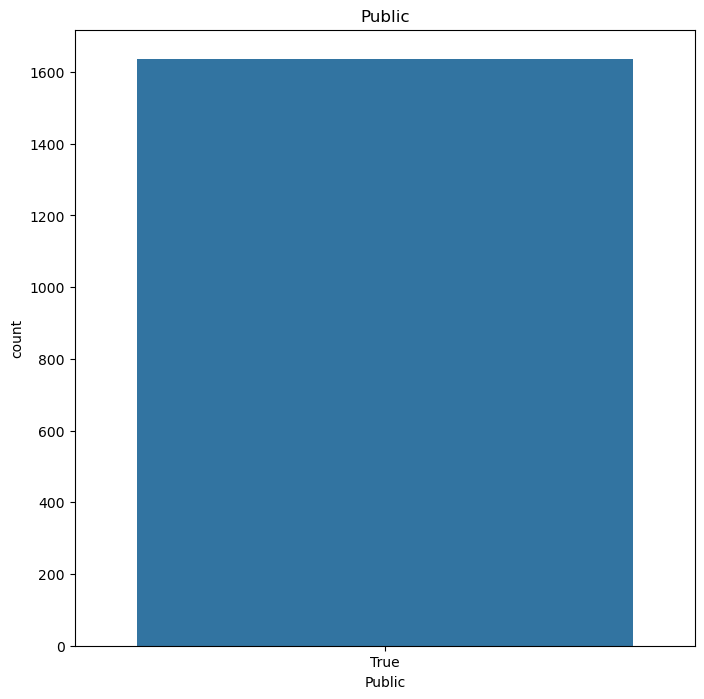

In [16]:
for columna in datos.select_dtypes("bool").columns:
    pintarGraficoBarras(datos, columna)

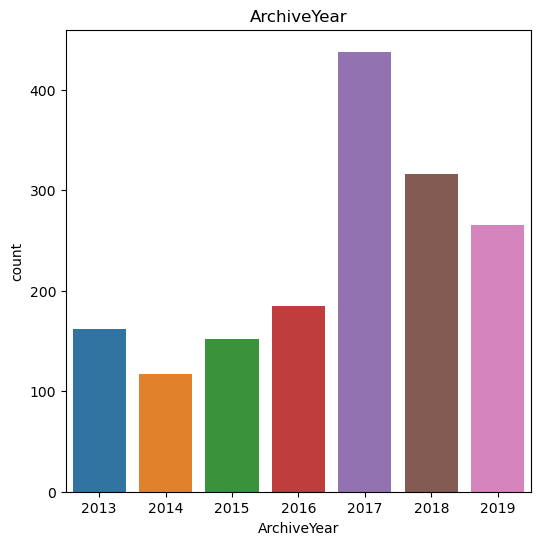

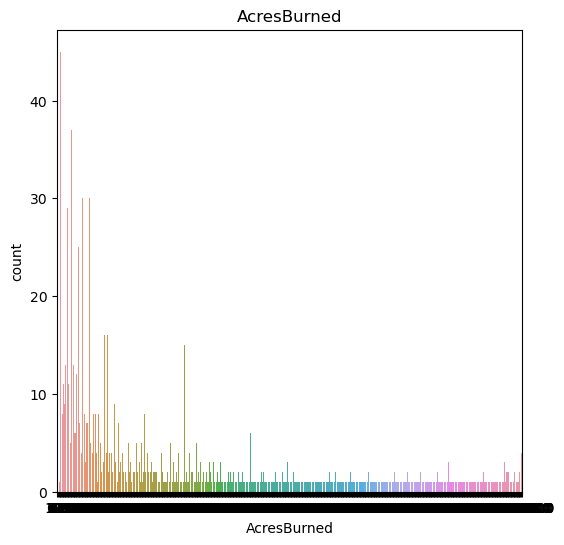

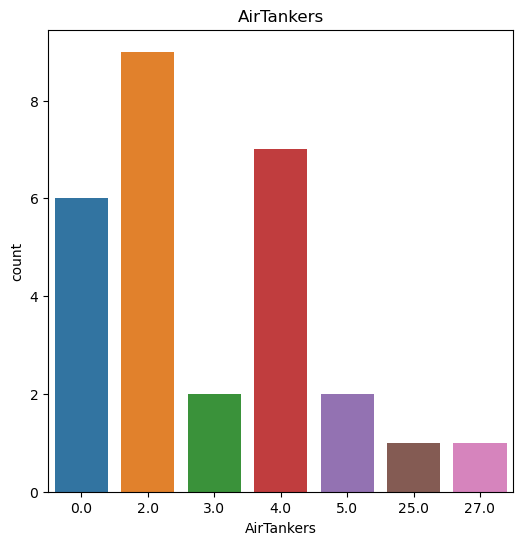

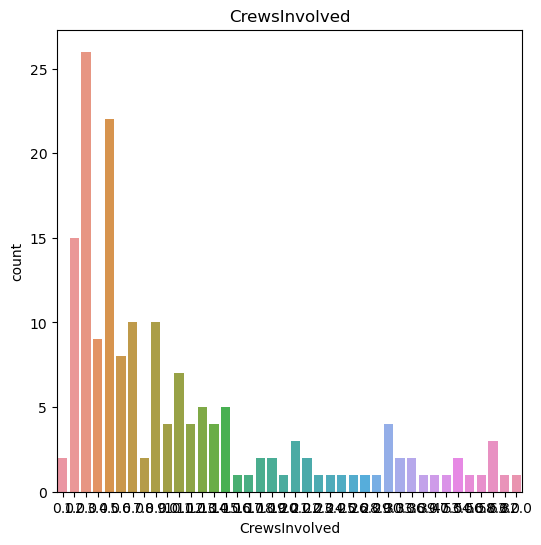

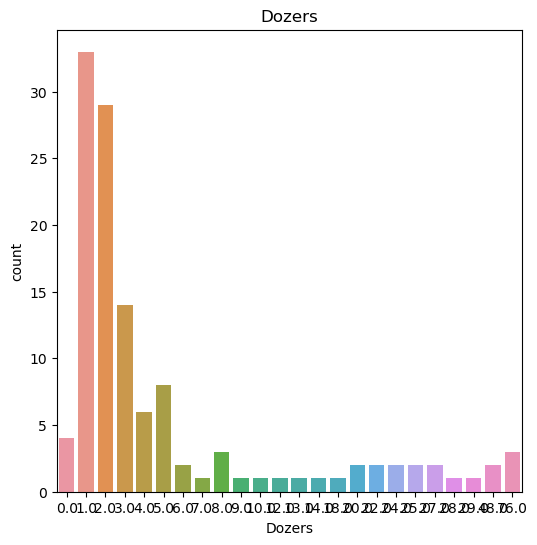

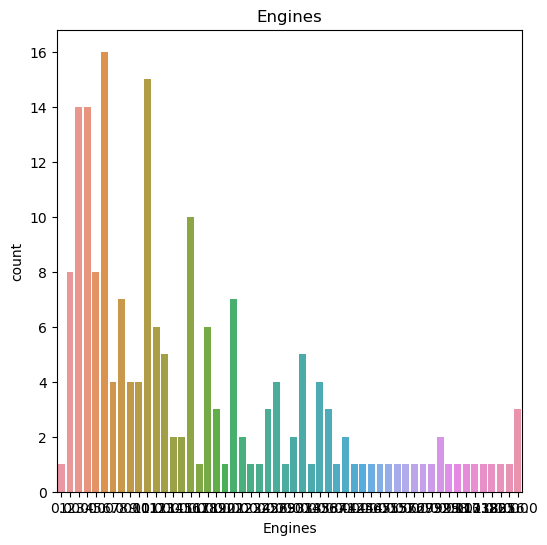

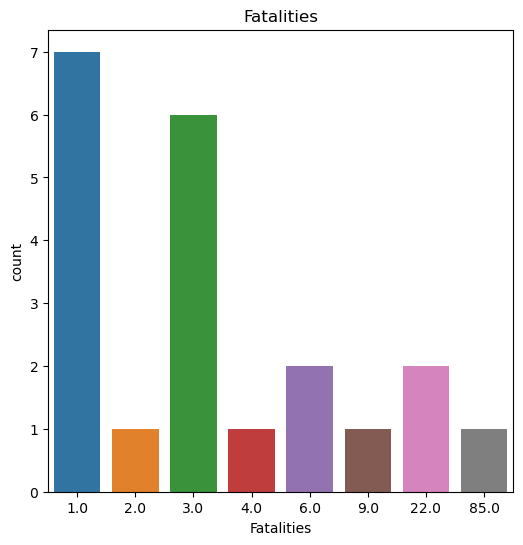

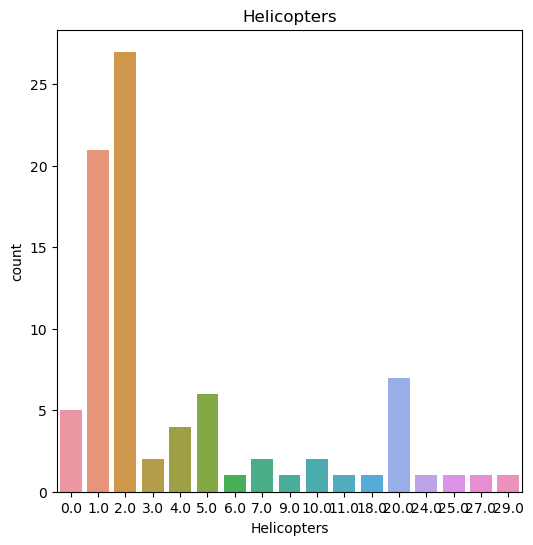

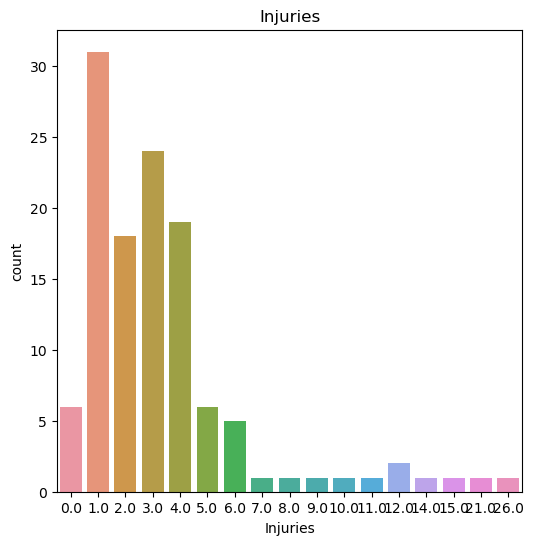

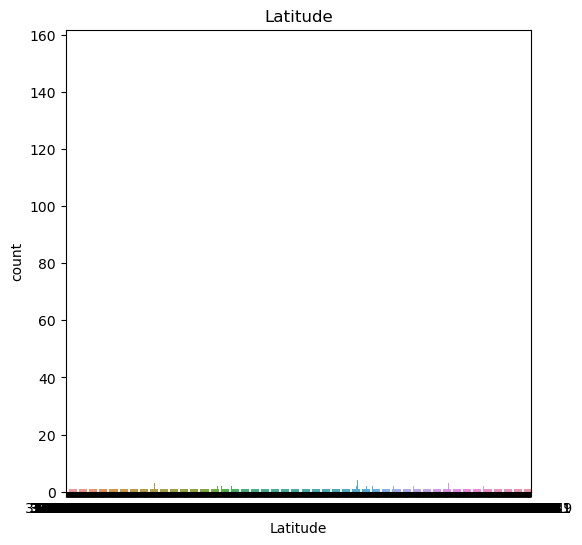

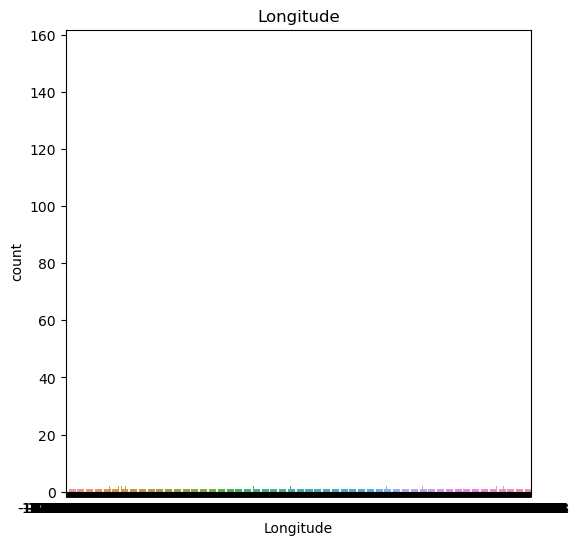

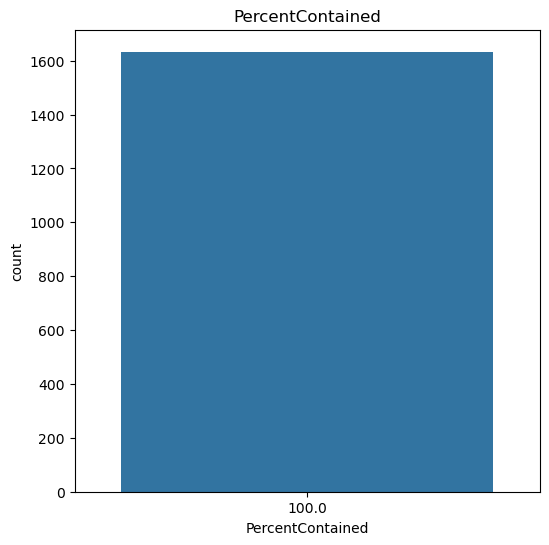

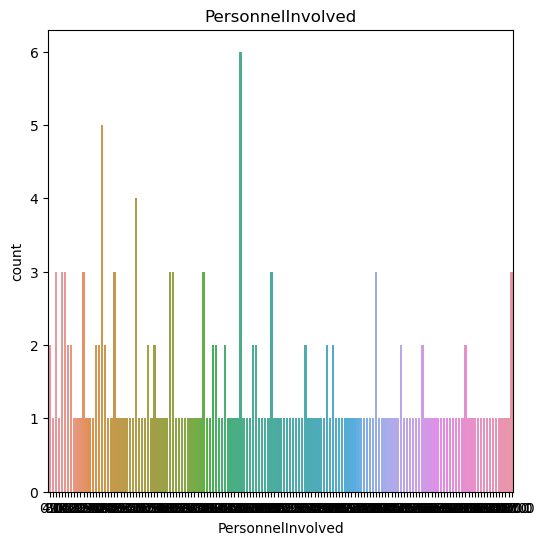

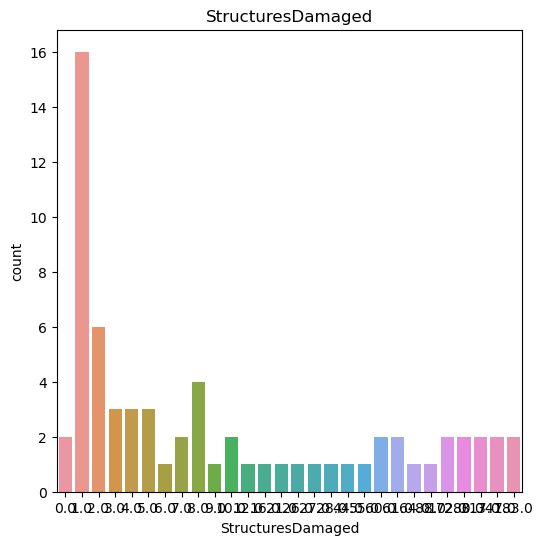

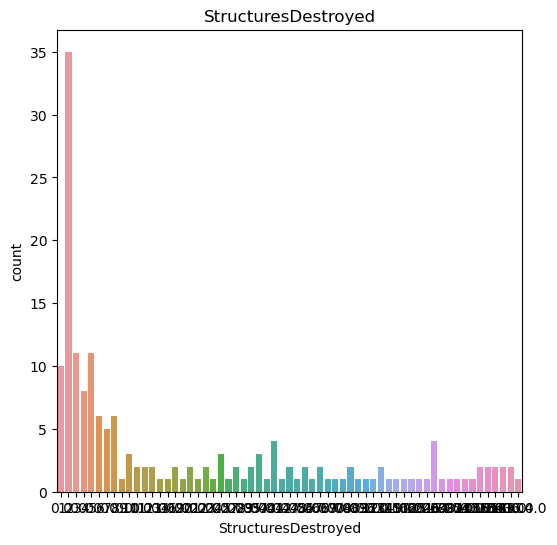

ValueError: min() arg is an empty sequence

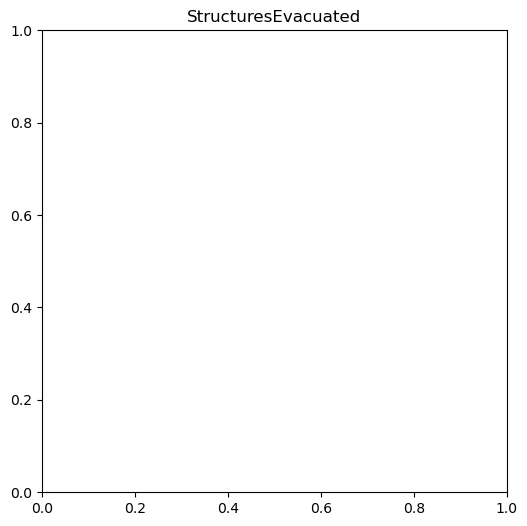

In [19]:
for columna in datos.select_dtypes("int64").columns:
    pintarGraficoBarras(datos, columna)
for columna in datos.select_dtypes("float64").columns:
    pintarGraficoBarras(datos, columna)

In [21]:
categorias=pd.cut(datos["StructuresDestroyed"], (0,10,50,500,1000000000), labels=["pequeño", "mediano", "grande", "muy grande"])

In [22]:
categorias.value_counts()

pequeño       88
mediano       38
grande        27
muy grande    12
Name: StructuresDestroyed, dtype: int64

In [25]:
print(datos["ConditionStatement"].dropna())

4       Acreage has been reduced based upon more accur...
6       Firefighters closed the containment lines toda...
9       Fire suppression repair will continue througho...
10      California Incident Management Team 5 will tra...
12      Firefighters continue to mop up within the fir...
                              ...                        
1609                            Forward progress stopped.
1612                               Forward spread stopped
1615    Forward rate of spread has been stopped. CAL F...
1626    <p>Great response by fire crews. Forward progr...
1635    As of 10:00 p.m. on 10/16, the fire is 90% con...
Name: ConditionStatement, Length: 284, dtype: object


In [52]:

import re
def extraerTelefono(texto):
    if str(texto) == 'nan':
        return texto
    PATRON="(\([0-9]{3}\))?([- ][0-9]{3,4}){2,4}"
    resultado=re.search(PATRON, texto)
    return resultado.group().strip() if resultado else np.NaN

datos["telefonos"] = datos["ConditionStatement"].apply(extraerTelefono)

In [54]:
datos["telefonos"].value_counts()

(530) 538-7373    2
209-966-3431      1
530-621-7631      1
(530) 336-6553    1
-800-468-4408     1
530-628-0039      1
760-539-3093      1
(707) 967-4207    1
(530) 538-7826    1
-800-325-9604     1
213-213-5228      1
209-372-0200      1
Name: telefonos, dtype: int64

In [55]:
datos["Started"]

0       2013-08-17T15:25:00Z
1       2013-05-30T15:28:00Z
2       2013-07-15T13:43:00Z
3       2013-08-10T16:30:00Z
4       2013-05-02T07:01:00Z
                ...         
1631    2019-10-10T12:08:00Z
1632    2019-06-28T15:03:04Z
1633    2019-11-25T12:02:02Z
1634    2019-10-22T19:20:44Z
1635    2019-10-14T15:32:20Z
Name: Started, Length: 1636, dtype: object

In [56]:
pd.to_datetime(datos["Started"])

0      2013-08-17 15:25:00+00:00
1      2013-05-30 15:28:00+00:00
2      2013-07-15 13:43:00+00:00
3      2013-08-10 16:30:00+00:00
4      2013-05-02 07:01:00+00:00
                  ...           
1631   2019-10-10 12:08:00+00:00
1632   2019-06-28 15:03:04+00:00
1633   2019-11-25 12:02:02+00:00
1634   2019-10-22 19:20:44+00:00
1635   2019-10-14 15:32:20+00:00
Name: Started, Length: 1636, dtype: datetime64[ns, UTC]

In [60]:
def convertirAFecha(texto):
    return pd.to_datetime(texto)

datos["Started"].apply(convertirAFecha)


fechas = datos["Started"].apply(lambda texto: pd.to_datetime(texto))

In [62]:
datos[ fechas > pd.to_datetime("2015-10-10 00:00:00+00:00") ]

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,telefonos
312,670.0,False,CAL FIRE San Benito - Monterey Unit,NaN,2015,True,/incidents/2015/10/12/cienega-fire/,NaN,NaN,San Benito,...,2015-10-12T16:00:00Z,Finalized,NaN,NaN,NaN,NaN,8e71e23c-6161-480e-b8ca-f03147475e4d,2015-10-16T18:00:00Z,4.0,NaN
386,58.0,False,Shasta-Trinity National Forest,NaN,2015,False,/incidents/2015/10/10/military-fire/,NaN,NaN,Siskiyou,...,2015-10-10T12:00:00Z,Finalized,NaN,NaN,NaN,NaN,e4223f98-44fa-44bd-9ec9-3219206068d2,2015-10-10T18:45:00Z,NaN,NaN
393,50.0,False,Ventura County Fire Department,NaN,2015,False,/incidents/2015/11/7/potrero-fire/,NaN,NaN,Ventura,...,2015-11-07T01:45:00Z,Finalized,NaN,NaN,NaN,NaN,3f31752f-4f51-4705-9fe4-50beec88a0e8,2015-11-07T16:45:00Z,NaN,NaN
411,29.0,False,Ventura County Fire Department,NaN,2015,False,/incidents/2015/11/11/banister-fire/,NaN,NaN,Ventura,...,2015-11-11T17:40:00Z,Finalized,NaN,NaN,NaN,NaN,f843961b-2c26-427d-87ba-0bde7ce9ecba,2015-11-12T18:00:00Z,NaN,NaN
423,21.0,False,Los Padres National Forest,NaN,2015,False,/incidents/2015/10/29/gibraltar-fire/,NaN,NaN,Santa Barbara,...,2015-10-29T05:30:00Z,Finalized,NaN,NaN,NaN,NaN,fbd3c0a8-7191-473c-bb05-43616711b6c5,2015-11-09T12:00:00Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN,NaN
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN,NaN
